In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

Let $ X_1, \dots, X_n \sim N(\mu,1)$.

(a) Simulate a data set (using $\mu=5$)
consisting of $n=100$ observations.

In [2]:
dataset = scipy.stats.norm.rvs(loc=5, scale=1, size=100)

(b) Take $f(\mu) = 1$ and find the posterior density.
Plot the density.

We have obtained analytically (see `pro_notes.pdf`) that
the posterior density is a $N(\overline{X}_n, 1/n)$ distribution.

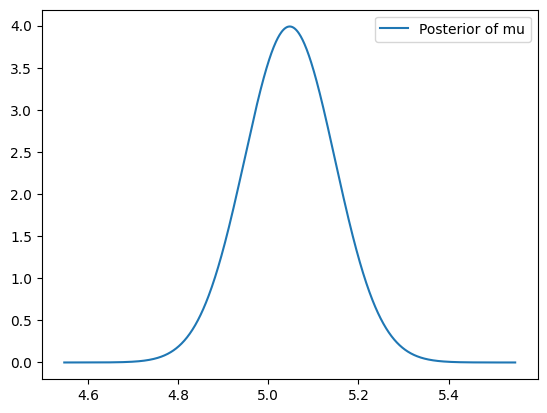

In [3]:
sample_mean = dataset.mean()
n = len(dataset)

x_mu = np.linspace(
    sample_mean-5/np.sqrt(n),
    sample_mean+5/np.sqrt(n),
    1000
)
y_mu = scipy.stats.norm.pdf(x_mu, loc=sample_mean, scale=1/np.sqrt(n))

plt.plot(x_mu, y_mu, label='Posterior of mu')
plt.legend(loc='best')
plt.show()

(c) Simulate 1,000 draws from the posterior.
Plot a histogram of the simulated values and
compare the histogram to the answer in (b).

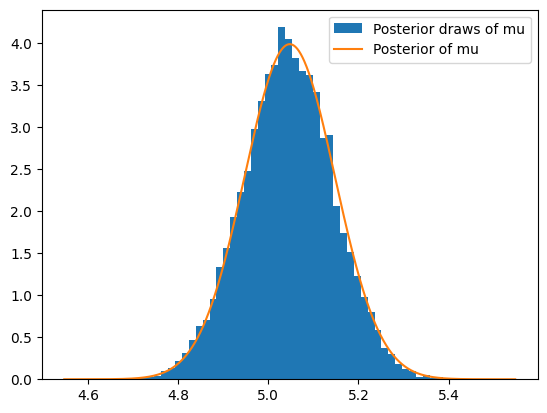

In [4]:
posterior_draws = scipy.stats.norm.rvs(loc=sample_mean, scale=1/np.sqrt(n), size=int(1e4))

plt.hist(posterior_draws, label='Posterior draws of mu', bins=50, density=True)
plt.plot(x_mu, y_mu, label='Posterior of mu')
plt.legend(loc='best')
plt.show()

(d) Let $\theta = e^\mu$.
Find the posterior density for $\theta$
analytically and by simulation.

Analytically we find that the posterior density of $\theta$
is a log-normal distribution with $\log\theta \sim N(\overline{X}_n, 1/n)$.

To obtain the posterior of $\theta$ by simulation
we draw from the known posterior of $\mu$
and then apply the transformation $x \mapsto \exp x$
to these draws.

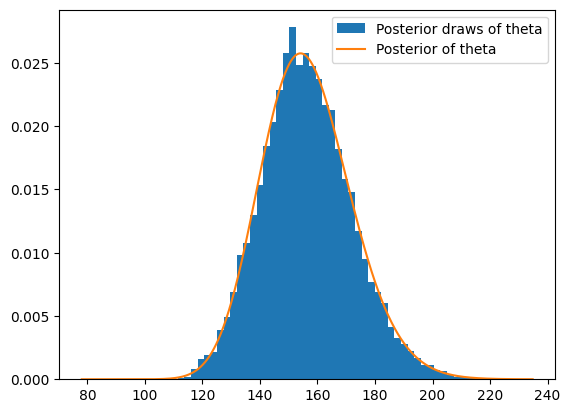

In [5]:
posterior_draws_mu = scipy.stats.norm.rvs(loc=sample_mean, scale=1/np.sqrt(n), size=int(1e4))
posterior_draws_theta = np.exp(posterior_draws_mu)
plt.hist(posterior_draws_theta, label='Posterior draws of theta', bins=50, density=True)

# theta_mean_est and theta_mean_std are only used to
# plot the analytic posterior of theta in the right place
theta_mean_est = scipy.stats.lognorm(s=1/np.sqrt(n), scale=np.exp(sample_mean)).mean()
theta_std_est = scipy.stats.lognorm(s=1/np.sqrt(n), scale=np.exp(sample_mean)).std()
x_theta = np.linspace(
    theta_mean_est-5*theta_std_est,
    theta_mean_est+5*theta_std_est,
    1000
)
y_theta = scipy.stats.lognorm.pdf(x_theta, s=1/np.sqrt(n), scale=np.exp(sample_mean))
plt.plot(x_theta, y_theta, label='Posterior of theta')

plt.legend(loc='best')
plt.show()

(e) Find a 95 percent posterior interval for $\mu$.

In [6]:
alpha = 0.05
z = scipy.stats.norm.isf(alpha/2)
delta = z/np.sqrt(n)

print(
    "We have obtained analytically that\n"
    "a 95 percent posterior interval\n"
    f"for mu is {sample_mean:.2f} +/- {delta:.2f}."
)

We have obtained analytically that
a 95 percent posterior interval
for mu is 5.05 +/- 0.20.


(f) Find a 95 percent posterior interval for $\theta$.

In [7]:
a = np.exp(sample_mean - delta)
b = np.exp(sample_mean + delta)

print(
    "We have obtained analytically that\n"
    "a 95 percent posterior interval\n"
    f"for theta is ({a:.0f}, {b:.0f})."
)

We have obtained analytically that
a 95 percent posterior interval
for theta is (128, 189).
